In [2]:
import os

import cv2
import matplotlib.pyplot as plt

# import pytesseract
# from PIL import Image
# import pandas as pd

In [3]:
files = os.listdir('screenshots')
file = os.path.join('screenshots',files[0])
file

'screenshots\\Screenshot (4).png'

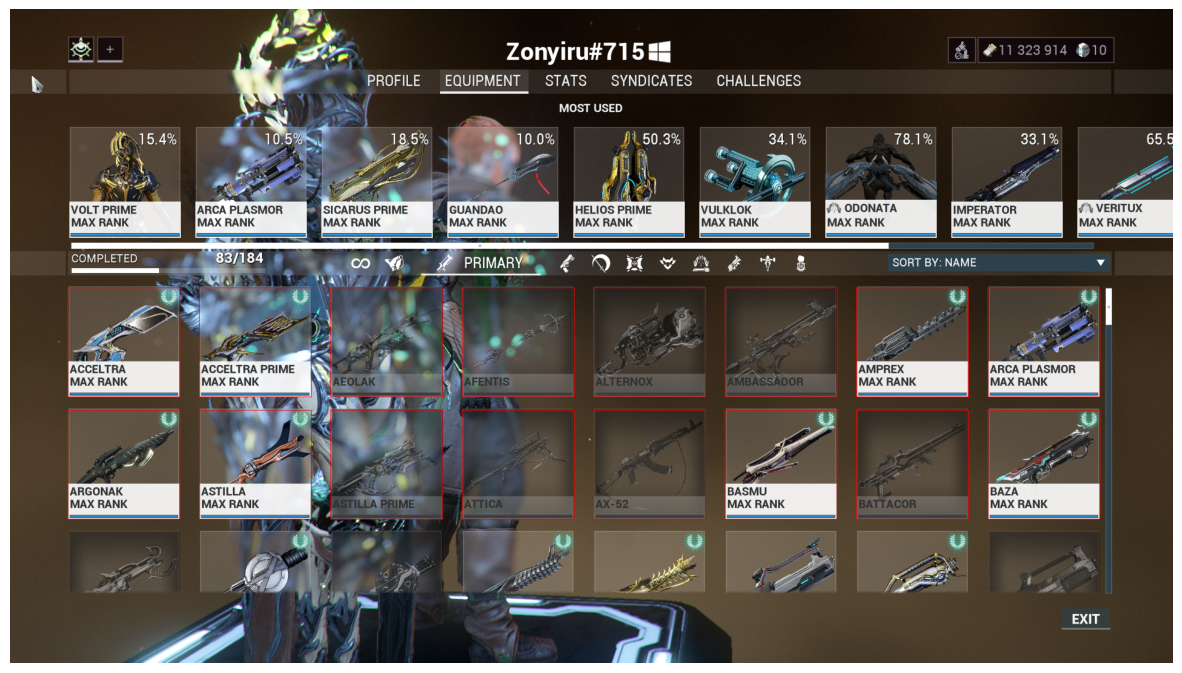

In [5]:
img = cv2.imread(file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameters
square_width = 185
square_height = 180
start_x = 95
start_y = 460
gap_x = square_width + 32  # Distance between rows
gap_y = square_height + 22  # Distance between columns

cropped = img[start_y:start_y+square_height, start_x:start_x+square_width]

# Draw squares
num_rows = 2  # Number of items per screenshot
num_cols = 8
for i in range(num_rows):
    for j in range(num_cols):
        top_left = (start_x + j * gap_x, start_y + i * gap_y)
        bottom_right = (start_x + j * gap_x + square_width, start_y + i * gap_y + square_height)
        cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 1)

# Plot image with squares
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

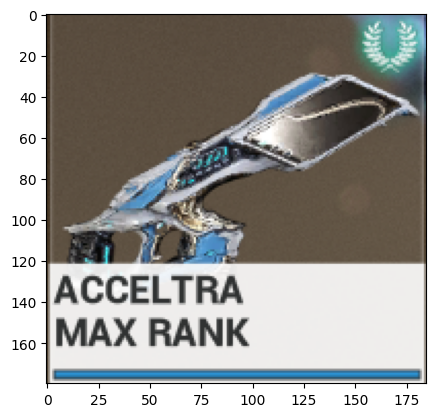

In [6]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

## Text extraction

In [8]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update path as needed


In [41]:
import pytesseract
import cv2
from PIL import Image
import os

# Convert to grayscale
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

# Apply thresholding (you can try different types of thresholding)
_, thresholded = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Convert the processed image back to a PIL image for pytesseract
pil_img = Image.fromarray(thresholded)

# Extract text using pytesseract
width, height = pil_img.size
pil_img = pil_img.crop((0, height/2, width, height))
text = pytesseract.image_to_string(pil_img, config=r'--oem 3 --psm 6')
print(text)


|ACCELTRA
MAX RANK |



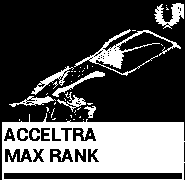

In [16]:
pil_img

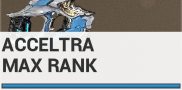

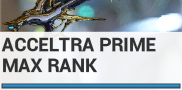

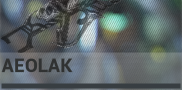

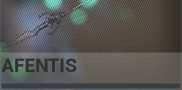

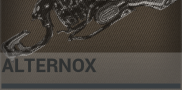

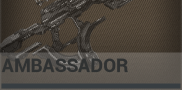

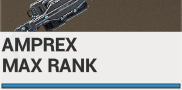

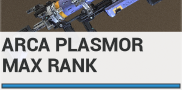

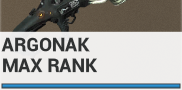

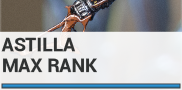

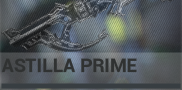

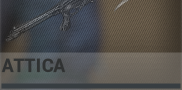

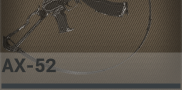

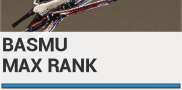

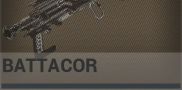

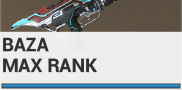

In [54]:
img = cv2.imread(file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameters
square_width = 182
square_height = 180
start_x = 97
start_y = 460
gap_x = 35  # Distance between rows
gap_y = 22  # Distance between columns

# Get text in every square
for idx_row in range(num_rows):
    for idx_col in range(num_cols):
        # Square sides
        left_side = start_x + idx_col * (square_width + gap_x)
        right_side = left_side + square_width
        top_side = start_y + idx_row * (square_height + gap_y)
        bottom_side = top_side + square_height

        # Square (crop image)
        top_side += int(square_height / 2) # Keep only text part
        cropped = img[top_side:bottom_side, left_side:right_side]
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

        # Show square
        display(Image.fromarray(cropped_rgb))

In [76]:
img = cv2.imread(file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameters
square_width = 182
square_height = 180
start_x = 97
start_y = 460
gap_x = 35  # Distance between rows
gap_y = 22  # Distance between columns

# Get text in every square
for idx_row in range(num_rows):
    for idx_col in range(num_cols):
        # Square sides
        left_side = start_x + idx_col * (square_width + gap_x)
        right_side = left_side + square_width
        top_side = start_y + idx_row * (square_height + gap_y)
        bottom_side = top_side + square_height

        # Square (crop image)
        top_side += int(square_height * 0.7) # Keep only text part
        bottom_side -= int(square_height / 5) # Remove "Max Rank"
        cropped = img[top_side:bottom_side, left_side:right_side]
        
        # Convert to grayscale
        gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

        # Apply thresholding
        _, thresholded = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

        # Convert the processed image back to a PIL image for pytesseract
        pil_img = Image.fromarray(thresholded)

        # Extract text using pytesseract
        text = pytesseract.image_to_string(pil_img, config=r'--oem 3 --psm 6')
        display(pil_img)
        print(text)

ACCELTRA



ACCELTRA PRIME



AMPREX



ARCA PLASMOR



ARGONAK



ASTILLA



BASMU



BAZA

